# 正态总体的假设检验
如果$x_i\sim N\left(  \mu, \sigma^2 \right)$，那么$\bar{x}\sim N\left(\mu,\frac{\sigma^2}{N}\right)$，或者，如果我们用样本方差替代总体方差，那么有：$$\frac{\bar{x}-\mu}{\sqrt{\frac{s^2}{N}}}\sim t(N-1)$$
如果在原假设：$H_0:\mu=\mu_0$的条件下，我们的假设检验统计量：$$\frac{\bar{x}-\mu_0}{\sqrt{\frac{s^2}{N}}}\sim t(N-1)$$
因而为了检验总体期望$\mu=\mu_0$，我们可以首先计算检验统计量，并确定拒绝域，进而做出决策。
我们知道，假设检验有两类错误，第I类错误即原假设为真，错误地拒绝原假设的概率；而第II类错误即备择假设为真，错误的接受原假设的概率。这两类错误可以使用势函数（power function）来表示。
在下面的程序中，我们将在原假设$H_0:\mu_0=0$的条件下，对不同的真实总体参数$\mu_0$重复进行1000次假设检验，并以此计算出拒绝原假设的概率，即势函数。

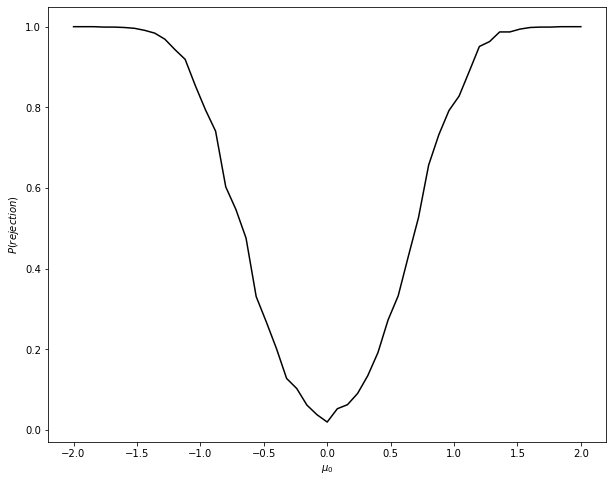

In [1]:
import numpy as np
from numpy import random as nprd
from scipy import special as func

def sampling(mu, sigma2, N):
    x=nprd.normal(mu,np.sqrt(sigma2),N)
    return x

def t_testing(x,mu0,alpha=0.05):
    """ t-Test under the H0: E(x)=mu0 """
    critical_value=func.stdtrit(len(x)-1,1-alpha/2)
    ## test statistic
    t=(np.mean(x)-mu0)/np.sqrt(np.std(x)/len(x))
    ## decision
    if t<-1*critical_value or t>critical_value:
        rejected=1
    else:
        rejected=0
    return rejected

## true value
mu=np.linspace(-2,2,51)
sigma2=1
N=10 # sample size
## iteration times
M=1000
## significance level and critical value
alpha=0.05

rejection=np.zeros(len(mu))
for j in range(len(mu)):
    m=mu[j]
    ## results
    rejected=np.zeros(M)
    for i in range(M):
        ## sampling
        x=sampling(m, sigma2, N)
        rejected[i]=t_testing(x,0,alpha)
    rejection[j]=np.mean(rejected)

## plot
## 导入matplotlib
import matplotlib.pyplot as plt 
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)

plt.plot(mu,rejection,label=r'Power',color='black') ## power function
plt.xlabel(r'$\mu_0$')
plt.ylabel(r'$P(rejection)$')
plt.show() ## 画图

# 非正态总体的大样本检验
如果$x_i\sim \left(  \mu, \sigma^2 \right)$，那么在大样本条件下，$\bar{x}\sim N\left(\mu,\frac{\sigma^2}{N}\right)$，或者，如果我们用样本方差替代总体方差，那么有：$$\frac{\bar{x}-\mu}{\sqrt{\frac{s^2}{N}}}\sim N\left(0,1\right)$$
如果在原假设：$H_0:\mu=\mu_0$的条件下，我们的假设检验统计量：$$\frac{\bar{x}-\mu_0}{\sqrt{\frac{s^2}{N}}}\sim N\left(0,1\right)$$
因而为了检验总体期望$\mu=\mu_0$，我们可以首先计算检验统计量，并确定拒绝域，进而做出决策。
特别的，当$x_i\sim Ber(p)$，即服从概率为$p$的伯努利分布时，在大样本条件下，我们可以用样本比例$\hat{p}=\bar{x}$对总体概率$p$进行检验，在$H_0:p=p_0$的原假设下，我们有如下两个检验统计量：
* 方法一： $$\frac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{N}}}\sim N\left(0,1\right)$$
* 方法二： $$\frac{\hat{p}-p_0}{\sqrt{\frac{\hat{p}(1-\hat{p})}{N}}}\sim N\left(0,1\right)$$
根据大数定律，$\hat{p}\rightarrow^p p_0$，因而以上两种方法在大样本条件下应该是等价的，而小样本情况下可能存在差异。
此外，我们还可以使用对数似然比检验（log likelihood ratio test）。我们知道，对于伯努利分布，其似然函数为：$$L\left(p|x\right)=\sum_{i=1}^{N}\left[ x_i\ln{p}+(1-x_i)\ln{1-p}\right]=N_1\ln{p}+(N-N_1)\ln{1-p}$$其中$N_1=\sum_{i=1}^N x_i$。在$H_0:p=p_0$的原假设下，即在$p=p_0$的约束下，似然函数为$$L\left(p_0|x\right)=N_1\ln{p_0}+(N-N_1)\ln{1-p_0}$$因而我们可以构建检验统计量：$$2\left[L\left(\hat{p}|x\right)-L\left(p_0|x\right)\right]\sim \chi^2(1)$$其中$\hat{p}$为$p$的极大似然估计。因而我们有：
* 方法三：$$2\left[L\left(\frac{N_1}{N}|x\right)-L\left(p_0|x\right)\right]\sim \chi^2(1)$$
接下来，我们将在原假设$H_0:p=0.5$的条件下，针对不同的真值$p_0$，重复1000次假设检验，比较以上三个检验统计量的势函数。

/tmp/ipykernel_5634/2438217076.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  z=np.sqrt(len(x))*(phat-p0)/np.sqrt(phat*(1-phat))
/tmp/ipykernel_5634/2438217076.py:44: RuntimeWarning: divide by zero encountered in log
  L=N1*np.log(phat)+(N-N1)*np.log(1-phat)
/tmp/ipykernel_5634/2438217076.py:44: RuntimeWarning: invalid value encountered in multiply
  L=N1*np.log(phat)+(N-N1)*np.log(1-phat)


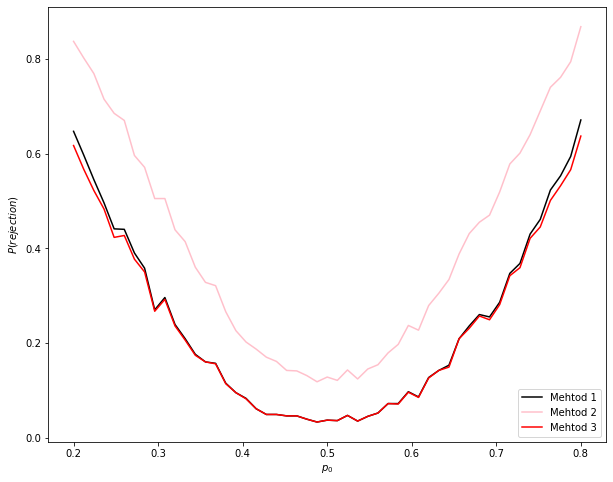

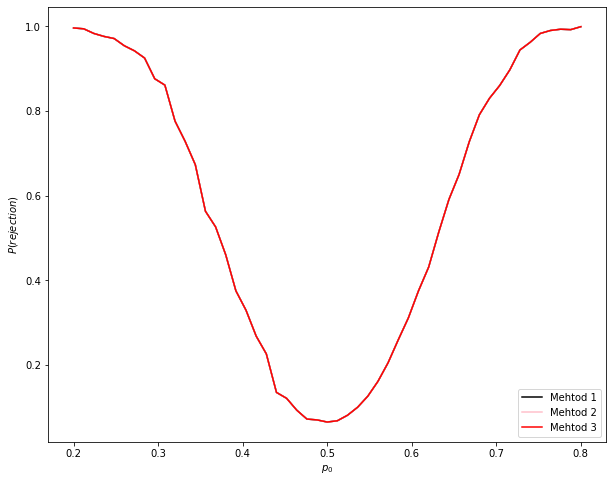

In [2]:
import numpy as np
from numpy import random as nprd
from scipy import special as func

def sampling(p,N):
    ## 产生Bernouli样本
    x=nprd.rand(N)<p
    return x

## first method
def z_testing1(x,p0,alpha=0.05):
    """ z-Test under the H0: p=p0 """
    critical_value=func.ndtri(1-alpha/2)
    ## test statistic
    z=np.sqrt(len(x))*(np.mean(x)-p0)/np.sqrt(p0*(1-p0))
    ## decision
    if z<-1*critical_value or z>critical_value:
        rejected=1
    else:
        rejected=0
    return rejected

## second method
def z_testing2(x,p0,alpha=0.05):
    """ z-Test under the H0: p=p0 """
    critical_value=func.ndtri(1-alpha/2)
    ## test statistic
    phat=np.mean(x)
    z=np.sqrt(len(x))*(phat-p0)/np.sqrt(phat*(1-phat))
    ## decision
    if z<-1*critical_value or z>critical_value:
        rejected=1
    else:
        rejected=0
    return rejected

## third method
def z_testing3(x,p0,alpha=0.05):
    """ likelihood ratio test under the H0: p=p0 """
    ## test statistic
    N=len(x)
    N1=np.sum(x)
    phat=np.mean(x)
    L=N1*np.log(phat)+(N-N1)*np.log(1-phat)
    L0=N1*np.log(p0)+(N-N1)*np.log(1-p0)
    chi=2*(L-L0)
    # p-value
    pvalue=1-func.chdtr(1,chi)
    ## decision
    if pvalue<alpha:
        rejected=1
    else:
        rejected=0
    return rejected

## true value
mu=np.linspace(0.2,0.8,51)

## iteration times
M=1000
## significance level
alpha=0.05


N=15 # sample size
rejection1=np.zeros(len(mu))
rejection2=np.zeros(len(mu))
rejection3=np.zeros(len(mu))
for j in range(len(mu)):
    m=mu[j]
    ## results
    rejected1=np.zeros(M)
    rejected2=np.zeros(M)
    rejected3=np.zeros(M)
    for i in range(M):
        ## sampling
        x=sampling(m, N)
        rejected1[i]=z_testing1(x,0.5,alpha)
        rejected2[i]=z_testing2(x,0.5,alpha)
        rejected3[i]=z_testing3(x,0.5,alpha)
    rejection1[j]=np.mean(rejected1)
    rejection2[j]=np.mean(rejected2)
    rejection3[j]=np.mean(rejected3)

## plot
## 导入matplotlib
import matplotlib.pyplot as plt 
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(mu,rejection1,label=r'Mehtod 1',color='black') ## power function 1
plt.plot(mu,rejection2,label=r'Mehtod 2',color='pink') ## power function 2
plt.plot(mu,rejection3,label=r'Mehtod 3',color='red') ## power function 2
plt.xlabel(r'$p_0$')
plt.ylabel(r'$P(rejection)$')
plt.legend(loc='lower right', frameon=True)
plt.show() ## 画图

N=50 # sample size
rejection1=np.zeros(len(mu))
rejection2=np.zeros(len(mu))
rejection3=np.zeros(len(mu))
for j in range(len(mu)):
    m=mu[j]
    ## results
    rejected1=np.zeros(M)
    rejected2=np.zeros(M)
    rejected3=np.zeros(M)
    for i in range(M):
        ## sampling
        x=sampling(m, N)
        rejected1[i]=z_testing1(x,0.5,alpha)
        rejected2[i]=z_testing2(x,0.5,alpha)
        rejected3[i]=z_testing3(x,0.5,alpha)
    rejection1[j]=np.mean(rejected1)
    rejection2[j]=np.mean(rejected2)
    rejection3[j]=np.mean(rejected3)

## plot
## 导入matplotlib
import matplotlib.pyplot as plt 
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(mu,rejection1,label=r'Mehtod 1',color='black') ## power function 1
plt.plot(mu,rejection2,label=r'Mehtod 2',color='pink') ## power function 2
plt.plot(mu,rejection3,label=r'Mehtod 3',color='red') ## power function 2
plt.xlabel(r'$p_0$')
plt.ylabel(r'$P(rejection)$')
plt.legend(loc='lower right', frameon=True)
plt.show() ## 画图

可以看到，在小样本（N=15）的情况下，第一种方法犯第I类错误的概率高于5%，而犯第II类错误的概率更小。相比较而言，另外两种方法犯第一类错误的概率都是5%，然而犯第II类错误的概率更高。
如果增大样本容量，如N=50，会发现三种检验方法都是渐进等价的。